In [1]:
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#####Generating time series AR of two different parameters:
ar_data = []
n = 0;
while (n<50):
    if (n<25):
        r = 0.9
    if (n>=25):
        r = -0.9
    
    ar1 = np.array([1,r])
    ma1 = np.array([1])
    MA_object1 = ArmaProcess(ar1, ma1)
    simulated_data = MA_object1.generate_sample(nsample=500)
    ar_data.append(simulated_data)
    n = n+1;
    
print(len(ar_data))

50


50


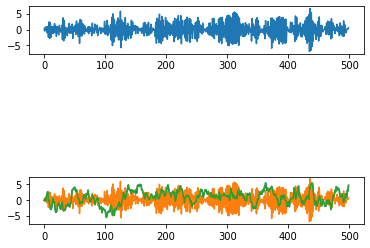

In [2]:
print (len(ar_data))
plt.subplot(4,1,1)
plt.plot(ar_data[0])
#plt.subplot(4,1,2)
#plt.plot(ar_data[10])
#plt.subplot(4,1,3)
#plt.plot(ar_data[25])
plt.subplot(4,1,4)
plt.plot(ar_data[35])


plt.plot(ar_data[0])
plt.plot(ar_data[35])

In [5]:
data = ar_data
print(len(data))

50


In [30]:
from sklearn.decomposition import PCA
pca_data = [];

pca_mod = PCA(n_components = 6).fit(data)
pca_data = pca_mod.fit_transform(data)
    
print(np.array(pca_data).shape)

pca_dt = pca_data[0];
pca_labels = [0]*25 + [1]*25

print(len(pca_labels))

(50, 6)
50


50


c:\users\sanik\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:13: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  del sys.path[0]


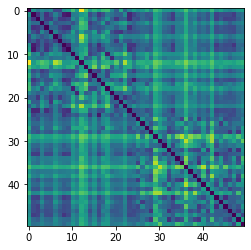

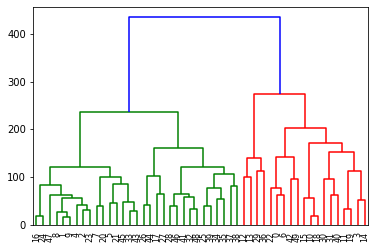

In [31]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import pairwise_distances
#import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
#X = [[0, 1], [1, 1]]1
# distance between rows of X
dist = euclidean_distances(pca_data, pca_data)
print(len(dist))
plt.imshow(dist)

plt.figure(2)
dendrogram = sch.dendrogram(sch.linkage(dist, method='ward'))

In [32]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(dist)
print(cluster.labels_)


adjusted_rand_score(pca_labels, cluster.labels_)

[0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0
 1 1 1 0 1 0 1 1 1 1 1 1 0]


c:\users\sanik\appdata\local\programs\python\python37-32\lib\site-packages\scipy\cluster\hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


0.021174590491410315

50


c:\users\sanik\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:17: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


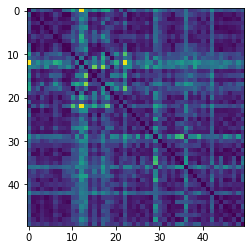

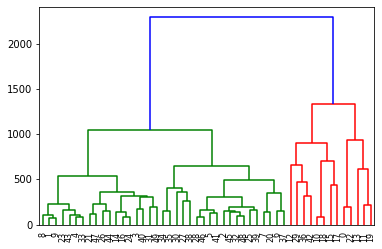

In [38]:
from dtw import dtw

# Here, we use L2 norm as the element comparison distance
l2_norm = lambda x, y: (x - y) ** 2
dist_dtw = []
for i in range(0,50):
    dist_temp = []
    for j in range(0,50):
        dist, cost_matrix, acc_cost_matrix, path = dtw(pca_data[i], pca_data[j], dist=l2_norm)
        dist_temp.append(dist)
    dist_dtw.append(dist_temp)

print(len(dist_dtw))
plt.imshow(dist_dtw)

plt.figure(2)
dendrogram = sch.dendrogram(sch.linkage(dist_dtw, method='ward'))

In [39]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(dist_dtw)
print(cluster.labels_)

adjusted_rand_score(pca_labels, cluster.labels_)

[0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1]


c:\users\sanik\appdata\local\programs\python\python37-32\lib\site-packages\scipy\cluster\hierarchy.py:830: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


0.0636942675159235